<a href="https://colab.research.google.com/github/vegikumar/dataset-classification/blob/main/dataset%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import sys
print ('python : {}' .format(sys.version))
import scipy
print ('scipy : {}' .format(scipy.__version__))
import numpy
print ('numpy : {}' .format(numpy.__version__))
import matplotlib
print ('matplotlib : {}' .format(matplotlib.__version__))
import pandas
print ('pandas : {}' .format(pandas.__version__))
import sklearn
print ('sklearn : {}' .format(sklearn.__version__))

python : 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
scipy : 1.4.1
numpy : 1.19.5
matplotlib : 3.2.2
pandas : 1.1.5
sklearn : 1.0.1


In [74]:
import pandas
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

In [75]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length' 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)

In [76]:
print(dataset.shape)

(150, 4)


In [77]:
print(dataset.head(20))

     sepal-lengthsepal-width  petal-length  petal-width        class
5.1                      3.5           1.4          0.2  Iris-setosa
4.9                      3.0           1.4          0.2  Iris-setosa
4.7                      3.2           1.3          0.2  Iris-setosa
4.6                      3.1           1.5          0.2  Iris-setosa
5.0                      3.6           1.4          0.2  Iris-setosa
5.4                      3.9           1.7          0.4  Iris-setosa
4.6                      3.4           1.4          0.3  Iris-setosa
5.0                      3.4           1.5          0.2  Iris-setosa
4.4                      2.9           1.4          0.2  Iris-setosa
4.9                      3.1           1.5          0.1  Iris-setosa
5.4                      3.7           1.5          0.2  Iris-setosa
4.8                      3.4           1.6          0.2  Iris-setosa
4.8                      3.0           1.4          0.1  Iris-setosa
4.3                      3.0      

In [78]:
print(dataset.describe())

       sepal-lengthsepal-width  petal-length  petal-width
count               150.000000    150.000000   150.000000
mean                  3.054000      3.758667     1.198667
std                   0.433594      1.764420     0.763161
min                   2.000000      1.000000     0.100000
25%                   2.800000      1.600000     0.300000
50%                   3.000000      4.350000     1.300000
75%                   3.300000      5.100000     1.800000
max                   4.400000      6.900000     2.500000


In [79]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


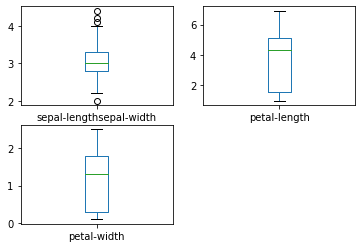

In [80]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

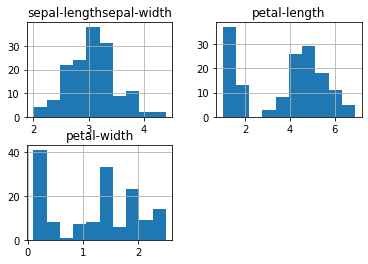

In [81]:
dataset.hist()
pyplot.show()

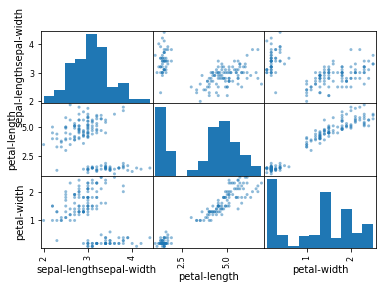

In [82]:
scatter_matrix(dataset)
pyplot.show()

In [83]:
array = dataset.values
X = array[:, 0:3]
Y = array[:, 3]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2, random_state=1)

In [84]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [85]:
results = []
names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  print('%s :%f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR :0.916667 (0.064550)
LDA :0.966667 (0.055277)
KNN :0.958333 (0.041667)
NB :0.958333 (0.041667)
SVM :0.975000 (0.038188)


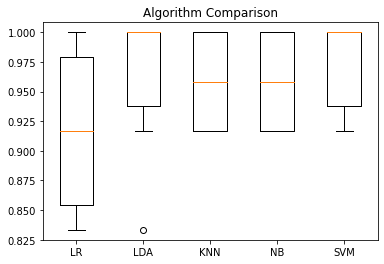

In [86]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [87]:
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [88]:
print(accuracy_score,(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

<function accuracy_score at 0x7ff44ca61ef0> (array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object), array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 